<a href="https://colab.research.google.com/github/YuvrazError/AMD-detection-using-CNN/blob/main/AMD_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
# Step 2: Load the Dataset with Adjusted Logic
import pandas as pd
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [6]:
# Define the paths
csv_path = '/content/drive/My Drive/Thesis/messidor_data.csv'
images_path = '/content/drive/My Drive/Thesis/preprocess/'

In [7]:
# Load the CSV file
df = pd.read_csv(csv_path)

In [8]:
# List all files in the images directory
image_files = os.listdir(images_path)
print(f"Found {len(image_files)} image files in the directory.")


Found 1744 image files in the directory.


In [9]:
# Check the first few entries in the CSV
print("First few entries in the CSV:")
print(df.head())

First few entries in the CSV:
                      id_code  diagnosis  adjudicated_dme  \
0  20051020_43808_0100_PP.png          0                0   
1  20051020_43832_0100_PP.png          1                0   
2  20051020_43882_0100_PP.png          1                0   
3  20051020_43906_0100_PP.png          2                1   
4  20051020_44261_0100_PP.png          0                0   

   adjudicated_gradable  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1  


In [10]:
# Define a function to load images with debugging
def load_images(df, img_folder):
    images = []
    not_found = []
    for img_id in df['id_code']:
        img_path = os.path.join(img_folder, img_id)
        if os.path.exists(img_path):
            img = load_img(img_path, target_size=(128, 128))
            img_array = img_to_array(img)
            images.append(img_array)
        else:
            not_found.append(img_id)
            print(f"Image {img_id} not found.")
    print(f"Total images not found: {len(not_found)}")
    return images


In [11]:
# Load the images
images = load_images(df, images_path)
labels = df['diagnosis'].values  # Assuming 'diagnosis' is the label column

Total images not found: 0


In [12]:
# Check the number of loaded images
print(f"Loaded {len(images)} images out of {len(df)} entries.")


Loaded 1744 images out of 1744 entries.


In [13]:
# Step 3: Preprocess the Data
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


In [14]:
# Convert images and labels to numpy arrays
X = np.array(images)
y = to_categorical(labels, num_classes=5)  # Assuming 5 classes

In [15]:
# Normalize the images
X = X / 255.0

In [16]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Step 4: Build the CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [18]:
# Build the CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))  # Assuming 5 classes

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [19]:
# Step 5: Train the Model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), batch_size=32)


Epoch 1/20
44/44 [==============================] - 50s 1s/step - loss: 1.2402 - accuracy: 0.5685 - val_loss: 1.1710 - val_accuracy: 0.5845
Epoch 2/20
44/44 [==============================] - 44s 1s/step - loss: 1.1647 - accuracy: 0.5828 - val_loss: 1.1327 - val_accuracy: 0.5845
Epoch 3/20
44/44 [==============================] - 45s 1s/step - loss: 1.1012 - accuracy: 0.5828 - val_loss: 1.0281 - val_accuracy: 0.5845
Epoch 4/20
44/44 [==============================] - 44s 996ms/step - loss: 1.0823 - accuracy: 0.5943 - val_loss: 1.0574 - val_accuracy: 0.5845
Epoch 5/20
44/44 [==============================] - 45s 1s/step - loss: 1.0707 - accuracy: 0.5864 - val_loss: 1.0115 - val_accuracy: 0.5874
Epoch 6/20
44/44 [==============================] - 44s 998ms/step - loss: 1.0623 - accuracy: 0.5835 - val_loss: 1.0078 - val_accuracy: 0.5989
Epoch 7/20
44/44 [==============================] - 44s 1s/step - loss: 1.0525 - accuracy: 0.6007 - val_loss: 1.0759 - val_accuracy: 0.6132
Epoch 8/20
44/

In [20]:
# Step 6: Visualize the Results
import matplotlib.pyplot as plt

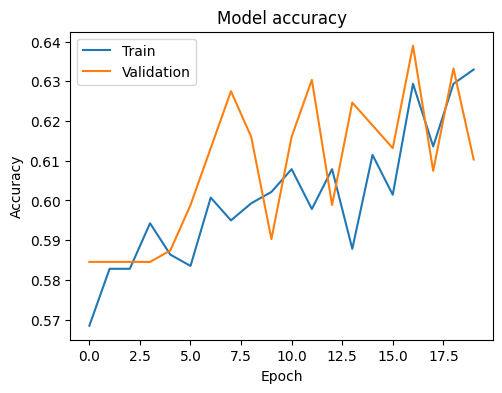

In [21]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')


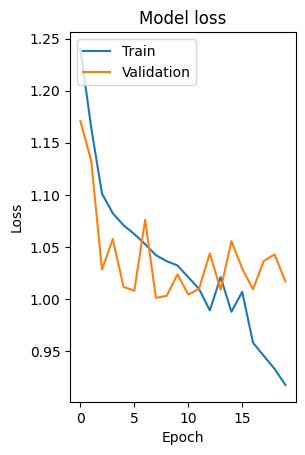

In [22]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()